In [1]:
#importing required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#importing the dataframe
df = pd.read_csv('energydata_complete.csv')

In [3]:
#checking the head of the data
df.head()

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,...,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
1,2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,...,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2,2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,...,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
3,2016-01-11 17:30:00,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,...,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389
4,2016-01-11 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,...,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097


In [4]:
#checking my columns
df.columns

Index(['date', 'Appliances', 'lights', 'T1', 'RH_1', 'T2', 'RH_2', 'T3',
       'RH_3', 'T4', 'RH_4', 'T5', 'RH_5', 'T6', 'RH_6', 'T7', 'RH_7', 'T8',
       'RH_8', 'T9', 'RH_9', 'T_out', 'Press_mm_hg', 'RH_out', 'Windspeed',
       'Visibility', 'Tdewpoint', 'rv1', 'rv2'],
      dtype='object')

In [9]:
#creating my first variable
#Temperature in the living room in Celsius
X = df[['T2']]

In [6]:
#creating my second variable
#Temperature outside the building
y = df[['T6']]

In [7]:
#importing train test split
from sklearn.model_selection import train_test_split

In [10]:
 X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [11]:
from sklearn.linear_model import LinearRegression

In [12]:
#where lm = linear_model
lm = LinearRegression()

In [14]:
lm.fit(X_train,y_train)

LinearRegression()

In [16]:
predictions = lm.predict(X_test)

In [17]:
predictions

array([[ 3.36810969],
       [ 9.26944595],
       [14.4817373 ],
       ...,
       [ 6.05760757],
       [ 9.46578671],
       [ 7.39124288]])

In [18]:
y_test

,T6
343,2.260000
13136,11.463333
19315,13.766667
4706,2.433333
5322,4.400000
...,...
6609,8.963333
6135,3.730000
6774,5.126667
15837,12.196667


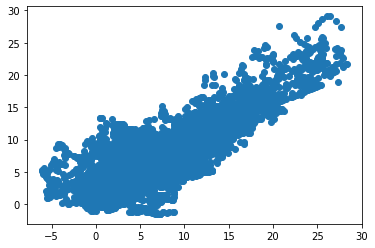

In [19]:
plt.scatter(y_test,predictions)

C:\Users\Oluwasogo\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

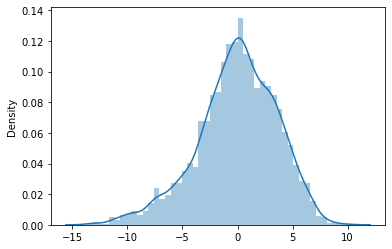

In [20]:
sns.distplot((y_test-predictions))

In [22]:
from sklearn.metrics import r2_score

In [23]:
#finding the r^2 value 
r2_score(y_test,predictions)

0.6458740034957209

In [24]:
#Firstly, we normalise our dataset to a common scale using the min max scaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [33]:
normalised_df = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

In [29]:
df.columns

Index(['date', 'Appliances', 'lights', 'T1', 'RH_1', 'T2', 'RH_2', 'T3',
       'RH_3', 'T4', 'RH_4', 'T5', 'RH_5', 'T6', 'RH_6', 'T7', 'RH_7', 'T8',
       'RH_8', 'T9', 'RH_9', 'T_out', 'Press_mm_hg', 'RH_out', 'Windspeed',
       'Visibility', 'Tdewpoint', 'rv1', 'rv2'],
      dtype='object')

In [32]:
#I initially dropped the date column because when i wanted to normalise the dataframe, i was getting an error that i could not convert date to a string so i decided to drop considering it was not going to be part of our features
df = df.drop(columns ='date')

In [90]:
features_df = normalised_df.drop(columns=['lights', 'Appliances'])

In [91]:
features_df

,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,RH_5,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,0.327350,0.566187,0.225345,0.684038,0.215188,0.746066,0.351351,0.764262,0.175506,0.381691,...,0.223032,0.677290,0.372990,0.097674,0.894737,0.500000,0.953846,0.538462,0.265449,0.265449
1,0.327350,0.541326,0.225345,0.682140,0.215188,0.748871,0.351351,0.782437,0.175506,0.381691,...,0.226500,0.678532,0.369239,0.100000,0.894737,0.476190,0.894872,0.533937,0.372083,0.372083
2,0.327350,0.530502,0.225345,0.679445,0.215188,0.755569,0.344745,0.778062,0.175506,0.380037,...,0.219563,0.676049,0.365488,0.102326,0.894737,0.452381,0.835897,0.529412,0.572848,0.572848
3,0.327350,0.524080,0.225345,0.678414,0.215188,0.758685,0.341441,0.770949,0.175506,0.380037,...,0.219563,0.671909,0.361736,0.104651,0.894737,0.428571,0.776923,0.524887,0.908261,0.908261
4,0.327350,0.531419,0.225345,0.676727,0.215188,0.758685,0.341441,0.762697,0.178691,0.380037,...,0.219563,0.671909,0.357985,0.106977,0.894737,0.404762,0.717949,0.520362,0.201611,0.201611
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19730,0.926786,0.537657,0.711655,0.606309,0.830841,0.579374,0.864865,0.765258,0.752031,0.339590,...,0.864724,0.729443,0.891747,0.602326,0.416667,0.238095,0.348718,0.901961,0.861981,0.861981
19731,0.919747,0.536006,0.701769,0.607836,0.825302,0.582178,0.864865,0.765258,0.754897,0.338487,...,0.864724,0.729443,0.887460,0.602326,0.421053,0.250000,0.361538,0.900452,0.985726,0.985726
19732,0.919747,0.538666,0.692651,0.627198,0.818378,0.603988,0.864865,0.771233,0.754897,0.337585,...,0.864724,0.729443,0.883173,0.602326,0.425439,0.261905,0.374359,0.898944,0.583979,0.583979
19733,0.919747,0.549491,0.677054,0.634717,0.805085,0.585294,0.864865,0.773794,0.752031,0.336583,...,0.864724,0.730581,0.878885,0.602326,0.429825,0.273810,0.387179,0.897436,0.126371,0.126371


In [92]:
appliances_target = normalised_df['Appliances']

In [93]:
#Now, we split our dataset into the training and testing dataset. Recall that we had earlier segmented the features and target variables.
from sklearn.model_selection import train_test_split

In [94]:
x_train, x_test, y_train, y_test = train_test_split(features_df, appliances_target,
test_size=0.3, random_state=42)


In [95]:
from sklearn.linear_model import LinearRegression

In [96]:
#where lm = LinearModel
lm = LinearRegression()

In [97]:
#fitting the model
lm.fit(x_train,y_train)

LinearRegression()

In [98]:
predicted_values = lm.predict(x_test)

In [99]:
from sklearn.metrics import mean_absolute_error

In [100]:
mean_absolute_error(y_test, predicted_values)


0.05013362397742957

In [101]:
 np.sum(np.square(y_test - predicted_values))

45.34762967266378

In [102]:
 from sklearn.metrics import mean_squared_error


In [103]:
np.sqrt(mean_squared_error(y_test, predicted_values))

0.08751444947661711

In [104]:
r2_score(y_test,predicted_values)

0.14890246319303524

In [111]:
weights_df = pd.DataFrame([X.columns, multiple_linear_model.coef_]).T
weights_df.columns = ["Features", "size"]
weights_df.sort_values(by="size", ascending=False)

,Features,size
1,NaN,0.553547
4,NaN,0.290627
10,NaN,0.236425
23,NaN,0.117758
14,NaN,0.101995
5,NaN,0.096048
11,NaN,0.038049
21,NaN,0.029183
6,NaN,0.028981
7,NaN,0.026386


In [109]:
multiple_linear_model = LinearRegression()
multiple_linear_model.fit(x_train, y_train)

LinearRegression()

In [113]:
from sklearn.linear_model import Ridge

ridge_model = Ridge(alpha=0.4)
ridge_model.fit(X_train, y_train)

test_predictions = ridge_model.predict(X_test)

#Root Mean Squared Error
np.sqrt(mean_squared_error(y_test, test_predictions))


0.09489047924415353

In [118]:
from sklearn.linear_model import Lasso

lasso_model = Lasso(alpha=0.001)
lasso_model.fit(x_train, y_train)

test_predictions = lasso_model.predict(x_test)

weightsdf = pd.DataFrame([x.columns, lasso_model.coef_]).T
weightsdf.columns = ["features", "size"]
weightsdf.sort_values(by="size", ascending=False)


,features,size
1,NaN,0.01788
21,NaN,0.002912
0,T2,0.0
12,NaN,-0.0
24,NaN,-0.0
23,NaN,0.0
22,NaN,0.0
19,NaN,-0.0
18,NaN,0.0
17,NaN,-0.0


In [84]:
lasso_weights_df

,Features,Lasso_weight
0,T7,0.000000
1,Tdewpoint,0.000000
2,Visibility,0.000000
3,Windspeed,0.000000
4,RH_out,-0.000000
5,Press_mm_hg,-0.000000
6,T_out,0.000000
7,RH_9,-0.000000
8,T9,0.000000
9,RH_8,-0.000000


In [119]:
#Root Mean Squared Error
np.sqrt(mean_squared_error(y_test, test_predictions))


0.09358170467245137